## 1. Importing Visualization Libraries and Data

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [13]:
matplotlib.__version__

'3.10.0'

In [14]:
# Importing Data
path = r'C:\Users\ztrim\07-2025 Boat Sales Analysis'

In [15]:
path

'C:\\Users\\ztrim\\07-2025 Boat Sales Analysis'

In [16]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'cleaned_boat_data.csv'), index_col = False)

In [17]:
df.head()

,Currency,Price,BoatType,Manufacturer,Type,YearBuilt,Length,Width,Material,ViewsLast7Days,FullLocation,Country
0,CHF,3337.0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,Unknown,226,Switzerland Lake Geneva Vésenaz,Switzerland
1,EUR,3490.0,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,Germany Bönningstedt,Germany
2,CHF,3770.0,Sport Boat,Marine power boats,new boat from stock,Unknown,3.69,1.42,Aluminium,124,Switzerland Lake of Zurich Stäfa ZH,Switzerland
3,DKK,25900.0,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,Unknown,64,Denmark Svendborg,Denmark
4,EUR,3399.0,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,Germany Bayern München,Germany


## Cleaning Data: pick out variables from your data set suitable for your exploratory visual analysis

In [18]:
df.shape

(9888, 12)

In [19]:
# Dropping irrelevant column
df.drop(columns=['FullLocation'], inplace=True)

In [20]:
df.head()

,Currency,Price,BoatType,Manufacturer,Type,YearBuilt,Length,Width,Material,ViewsLast7Days,Country
0,CHF,3337.0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,Unknown,226,Switzerland
1,EUR,3490.0,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,Germany
2,CHF,3770.0,Sport Boat,Marine power boats,new boat from stock,Unknown,3.69,1.42,Aluminium,124,Switzerland
3,DKK,25900.0,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,Unknown,64,Denmark
4,EUR,3399.0,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,Germany


## Exploring Relationships

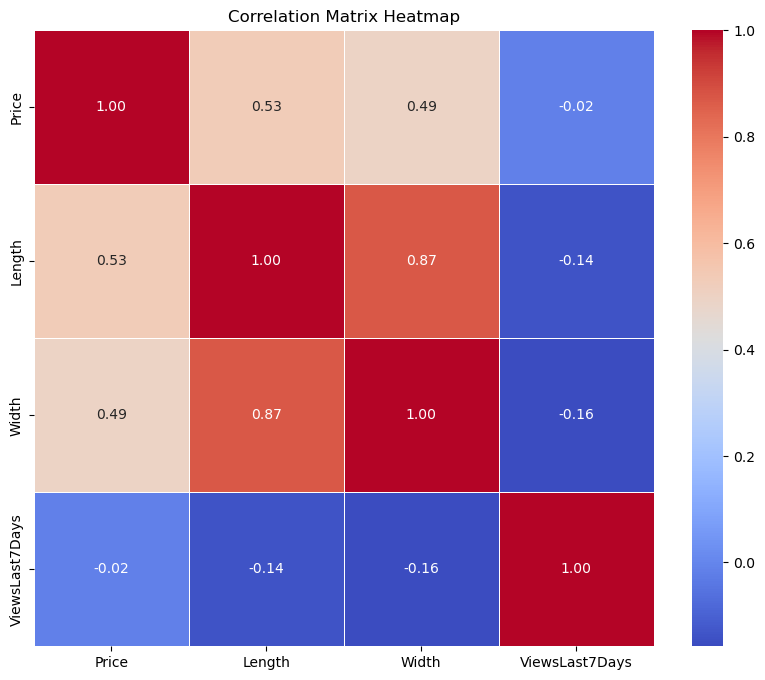

In [23]:
# Step 3: Create a correlation matrix heatmap
plt.figure(figsize=(10, 8))
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [24]:
# Discuss what the coefficients in the plot mean in terms of the relationships between the variables:

# Price & Length: Strong positive correlation — longer boats tend to have higher prices.
# Price & Width: Moderate positive correlation — wider boats are generally more expensive, though with more variance than length.
# Price & YearBuilt: Moderate positive correlation — newer boats (higher year built) tend to have higher prices.
# ViewsLast7Days: shows only a weak correlation with Price, suggesting views alone don’t explain price variation.

# These insights help identify which variables to focus on during further analysis. 


In [25]:
# Step 4: Createing scatterplots for the variables with the strongest correlations and examine the nature of their relationships.

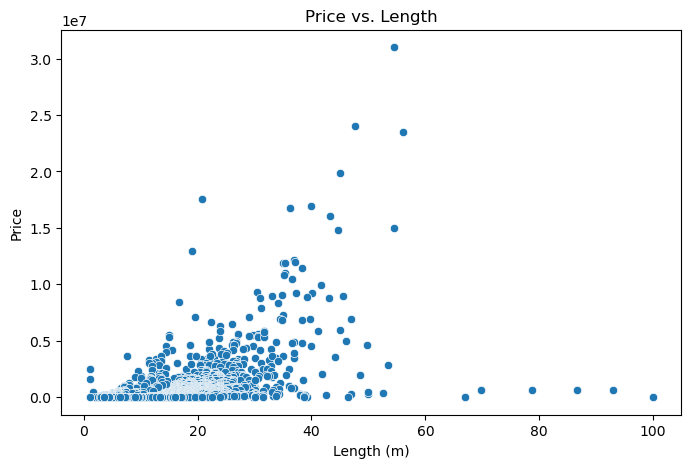

In [26]:
# Scatterplot: Price vs. Length
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Length', y='Price', data=df)
plt.title('Price vs. Length')
plt.xlabel('Length (m)')
plt.ylabel('Price')
plt.show()

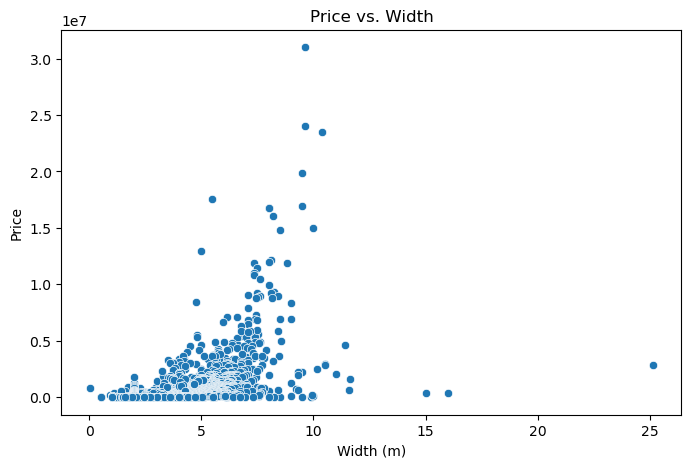

In [27]:
# Scatterplot: Price vs. Width
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Width', y='Price', data=df)
plt.title('Price vs. Width')
plt.xlabel('Width (m)')
plt.ylabel('Price')
plt.show()

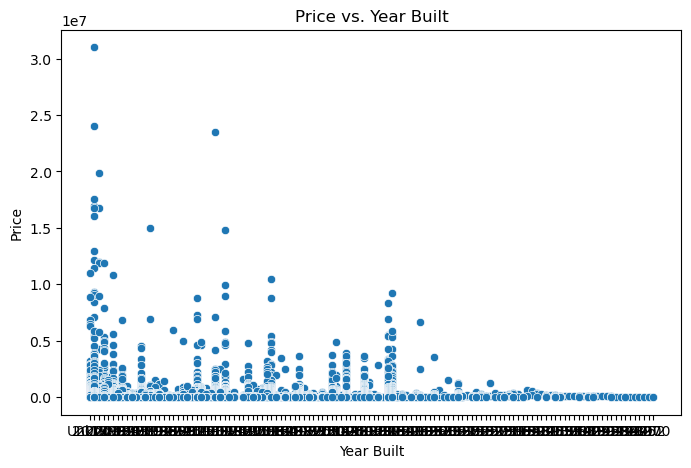

In [28]:
# Scatterplot: Price vs. YearBuilt
plt.figure(figsize=(8, 5))
sns.scatterplot(x='YearBuilt', y='Price', data=df)
plt.title('Price vs. Year Built')
plt.xlabel('Year Built')
plt.ylabel('Price')
plt.show()

In [31]:
# Convert non-numeric values like 'Unknown' to NaN to fix the scatterplot above.
df['YearBuilt'] = pd.to_numeric(df['YearBuilt'], errors='coerce')

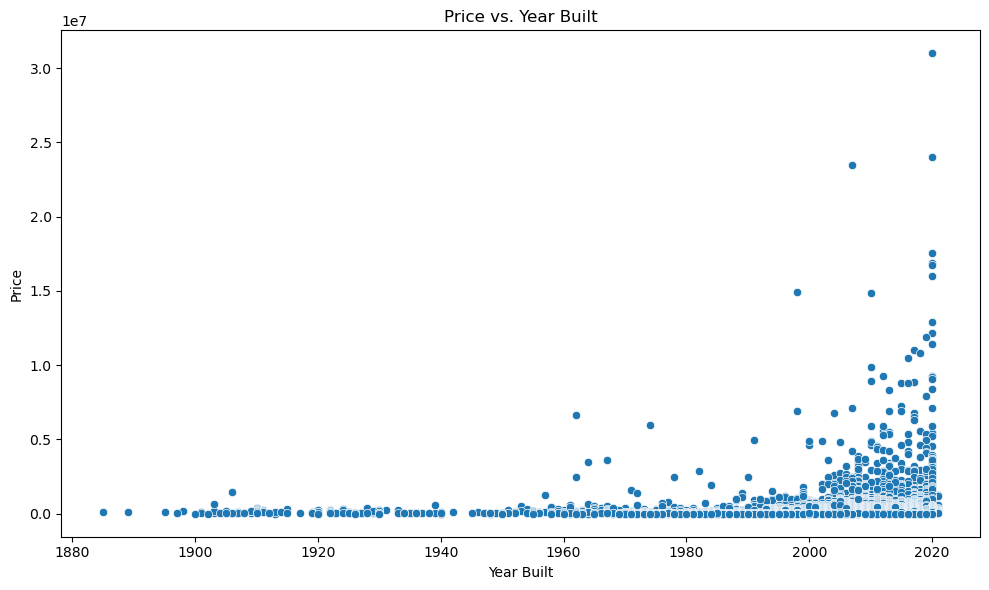

In [33]:
# Scatterplot: Price vs. YearBuilt (Plot 2)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='YearBuilt', y='Price', data=df)
plt.title('Price vs. Year Built')
plt.xlabel('Year Built')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

In [34]:
# Discuss the output in a markdown cell.

# Price vs Length: Displays a linear trend — price increases with length. A few extreme outliers are present at high prices.
# Price vs Width: Similar positive trend but more spread in values. Width appears to be a less reliable predictor than length.
# Price vs YearBuilt: Newer boats tend to be more expensive, tthough the trend isn’t perfectly linear and prices fluctuate more for boats built after 2000 -2010. 

# These visuals confirm the patterns suggested by the correlation heatmap.


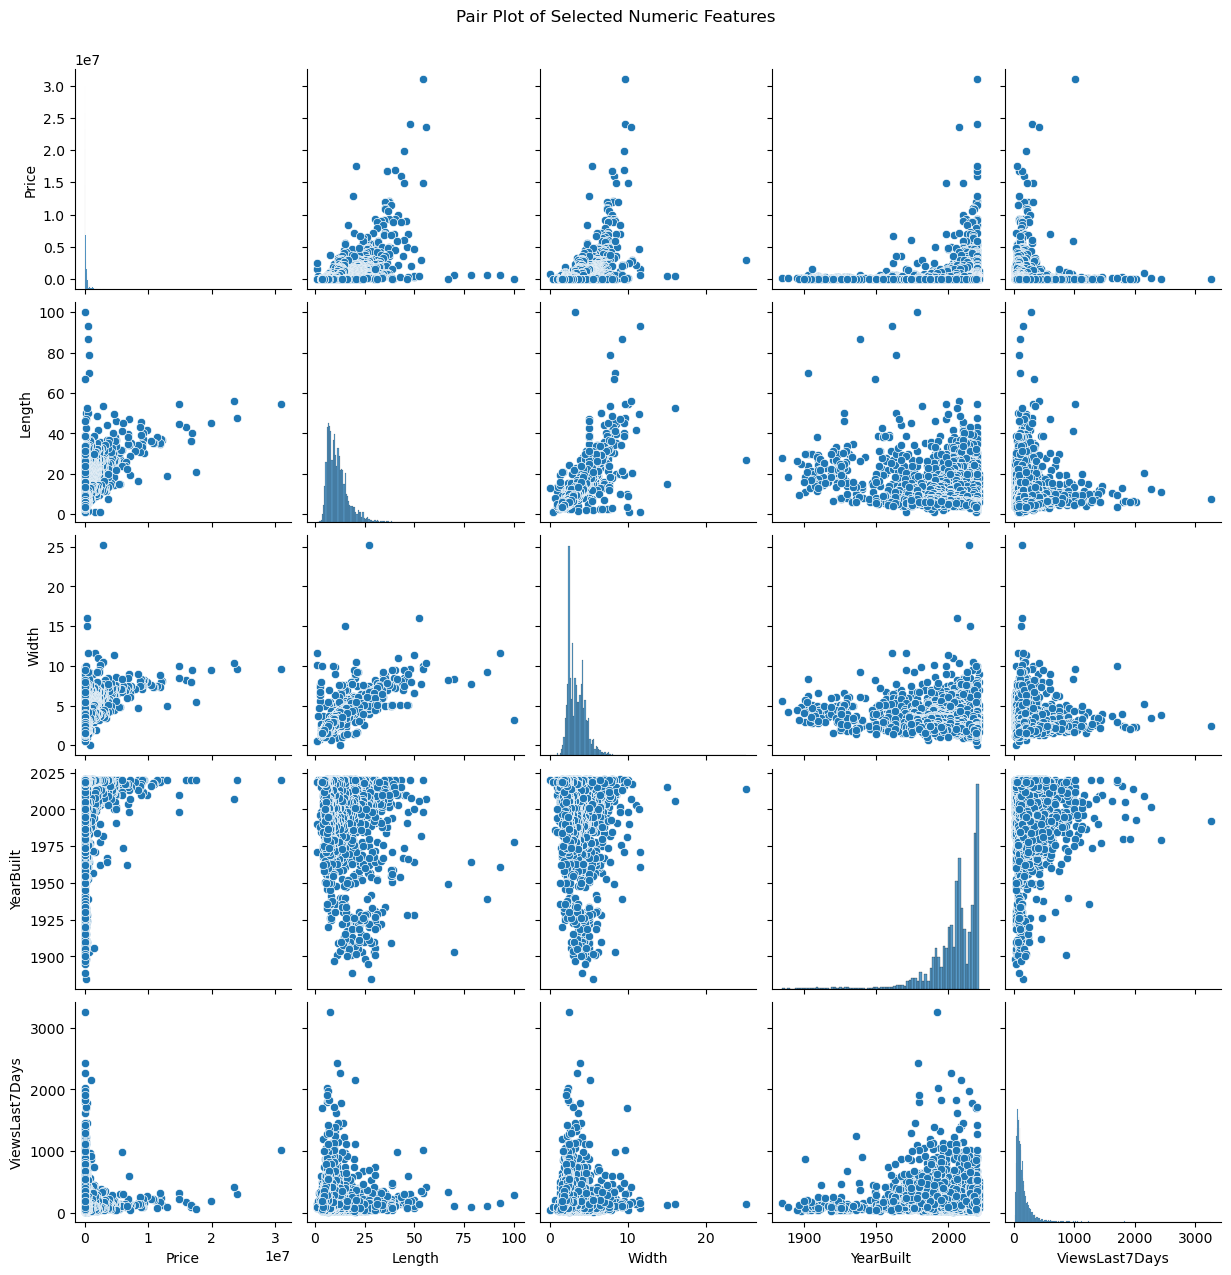

In [36]:
# Step 5: Create a pair plot of the entire data set.
sns.pairplot(df[['Price', 'Length', 'Width', 'YearBuilt', 'ViewsLast7Days']])
plt.suptitle('Pair Plot of Selected Numeric Features', y=1.02)
plt.show()

In [46]:
# Comment on the distribution of the variables and mark variables you’d like to explore further with an explanation of why:

# Price has a right-skewed distribution, with a few high-value outliers standing out.

# The clearest relationships appear to be:

# Price vs Length

# Price vs YearBuilt

# It’s worth digging a bit deeper into categorical features like Material and BoatType, using appropriate plots to see if any patterns emerge.


In [42]:
# Step 6: Create a categorical plot and interpret the results.

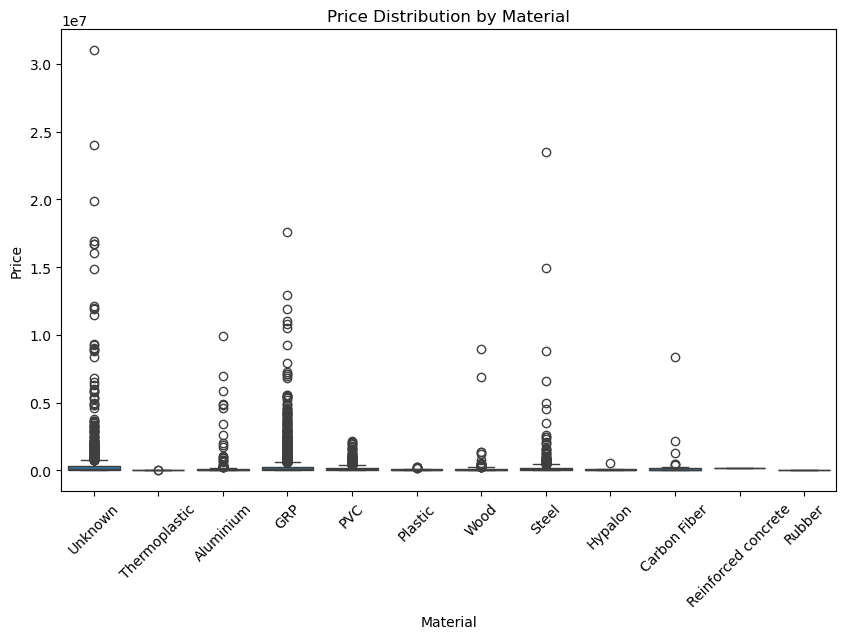

In [44]:
# Price by Material
plt.figure(figsize=(10, 6))
sns.boxplot(x='Material', y='Price', data=df)
plt.xticks(rotation=45)
plt.title('Price Distribution by Material')
plt.show()

In [47]:
# NOTES: I have to filter to top 10 most common boat types as there are too many categories

In [48]:
# Top 10 most common boat types
top_types = df['BoatType'].value_counts().head(10).index

In [49]:
# Filter the DataFrame
df_top_types = df[df['BoatType'].isin(top_types)]

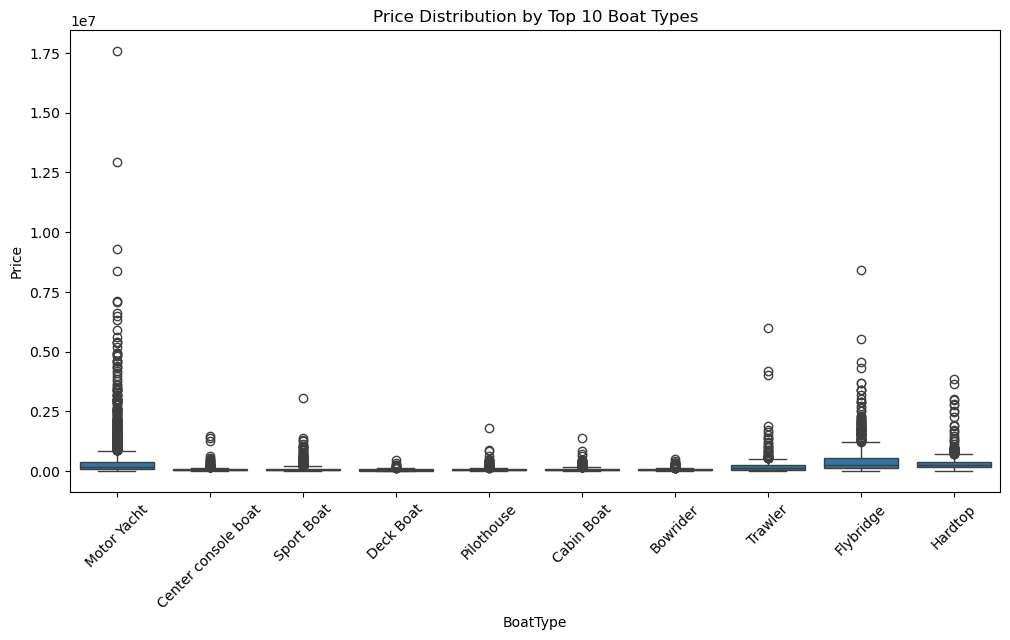

In [51]:
# Re-do the plot: 
plt.figure(figsize=(12, 6))
sns.boxplot(x='BoatType', y='Price', data=df_top_types)
plt.xticks(rotation=45)
plt.title('Price Distribution by Top 10 Boat Types')
plt.show()

In [53]:
# Interpret the results


# Material: GRP, Steel, and Aluminium boats have the highest price ranges. Wood and Plastic boats tend to be cheaper. "Unknown" has wide variation, likely due to missing data.

# Boat Type: Motor Yachts show the highest prices and the most outliers. Flybridge and Trawler boats are also more expensive. Smaller boats like Bowriders and Deck Boats have lower prices.

# These plots show that both Material and Boat Type are important factors influencing price.

## Step 7: Revisiting questions
## Step 8: Define any hypotheses 


In [56]:
# Step 7:
# 1. How do length and width affect boat prices?
#   - Length and width both positively correlate with price. Length has a stronger linear relationship.

# 2. Is there a relationship between boat age and price?
#   - Yes. Newer boats (higher `YearBuilt`) tend to be more expensive.

# 3. Which materials or boat types command higher prices on average?
#   - Steel and fiberglass boats have higher median prices. Larger yachts are among the most expensive types.

# 4. Do more viewed listings tend to be cheaper, newer, or smaller?
#   - Views show weak correlation to price. This may warrant additional feature engineering or grouping.

# 5. What factors best predict price using regression?
#   - Length, YearBuilt, Material, and BoatType appear to be strong predictors.

# 6. Can we identify clear market segments using clustering?
#   - Yes — the patterns in BoatType and Material suggest distinct market groups (E.g. luxury vs budget).


In [57]:
# Step 8: 
# Boats with greater length are significantly more expensive on average.
# Boats made from steel or fiberglass have higher median prices than those made from wood.
# Newer boats (YearBuilt from 2015) will have significantly higher prices than older boats.
# Certain boat types (e.g. yachts) clearly fall into a separate high-end segment of the market.
